In [8]:
import tensorflow as tf
%pip install pandas
%pip install sklearn
import pandas as pd
from detection import isbn_utils
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.


In [9]:
BASE_DIR = './S1'

# Get the subdirectories that contain the experiment files
data, model, vocab = isbn_utils.set_experiment_dirs(BASE_DIR)

print(
    f'base directory: {BASE_DIR}\n\n'
    f'data: {data}\n'
    f'model: {model}\n'
    f'vocab: {vocab}\n'
)

base directory: ./S1

data: ./S1/data
model: ./S1/model
vocab: ./S1/vocab



In [10]:
pd.set_option('display.max_colwidth', None)

# Load the datasets into dataframes
train_df = pd.read_csv(f'{data}/train_data.csv')
test_df = pd.read_csv(f'{data}/test_data.csv')

# Preview the first 10 rows of the training set
train_df[:10]

,title,link,domain,published_date,topic
0,"NSW remains on COVID-19 high alert | The Star | Newcastle, NSW",https://www.newcastlestar.com.au/story/6878465/nsw-remains-on-covid-19-high-alert/?cs=7,newcastlestar.com.au,2020-08-13 17:32:28,HEALTH
1,Missing people: How does someone just disappear?,https://www.bbc.co.uk/news/uk-england-cambridgeshire-53648599,bbc.co.uk,2020-08-04 15:56:20,NATION
2,"An American Pickle review: In a dual role, Seth Rogen’s drama wins over comedy",https://www.polygon.com/2020/8/6/21357120/american-pickle-review-movie-seth-rogen-simon-rich-hbo-max,polygon.com,2020-08-06 15:58:22,ENTERTAINMENT
3,"Katie Spotz to Run 130 Miles to Bring Clean Water to Tanzania, Shares Testimony of Change",http://www.christianitydaily.com/articles/9647/20200807/katie-spotz-run-130-miles-bring-clean-water-tanzania-shares.htm,christianitydaily.com,2020-08-07 19:45:00,NATION
4,CDC Director Says This Fall Could Be ‘the Worst’ We’ve Ever Had Thanks to COVID-19,https://www.self.com/story/worst-fall-ever-covid,self.com,2020-08-13 19:37:52,HEALTH
5,Free water and electricity may be counterproductive – Economist,https://www.ghanaweb.com/GhanaHomePage/NewsArchive/Free-water-and-electricity-may-be-counterproductive-Economist-1031098,ghanaweb.com,2020-08-11 13:25:37,NATION
6,State places Tazewell County on COVID-19 warning list,https://week.com/2020/08/07/state-places-tazewell-county-on-covid-19-warning-list/,week.com,2020-08-07 18:00:24,HEALTH
7,Over 100 people quarantined in Mississippi school district after several test positive for coronavirus,https://www.nbcnews.com/news/us-news/over-100-people-quarantined-mississippi-school-district-after-several-test-n1236012,nbcnews.com,2020-08-06 16:35:00,NATION
8,How global warming is wiping out Africa's oldest baobab trees,http://www.capetalk.co.za/articles/307750/how-global-warming-is-wiping-out-africa-s-oldest-baobab-trees,capetalk.co.za,2018-06-14 12:00:53,WORLD
9,"Delay routine dental checkups, WHO urges, until COVID risk is known","https://www.thepeninsulaqatar.com/article/11/08/2020/Delay-routine-dental-checkups,-WHO-urges,-until-COVID-risk-is-known",thepeninsulaqatar.com,2020-08-11 17:13:00,HEALTH


In [11]:
# Indices of the dataframe to use
start_index = 30
end_index = 40

# Sample titles to label
train_df[['title']][start_index:end_index]

# # When you're done, uncomment the next line to see the 'true' labels 
train_df[['title', 'topic']][start_index:end_index]

,title,topic
30,"28% Fall in Mumbai's Home Isolation Cases, 62% Drop in Institutional Quarantine as Covid Curve Plateaus",NATION
31,Sniffer dogs begin trials to detect Covid,HEALTH
32,Seth Rogen says Marvel blockbusters make it difficult for comedy films,ENTERTAINMENT
33,"Farewell to Pete Way, the debauched bassist with a frontman's swagger",ENTERTAINMENT
34,Poo detectives on the COVID-19 frontline,HEALTH
35,Fortnite maker challenges Apple and Google's app store rules through direct-payment discounts,TECHNOLOGY
36,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,BUSINESS
37,Forex auction bolsters productive sector,NATION
38,Intel Tiger Lake could outrun AMD Ryzen 4000 in single-core performance,TECHNOLOGY
39,Rappi delivery workers in Colombia's Bogota strike over conditions,TECHNOLOGY


In [12]:
# Load the model
model = tf.keras.models.load_model(model)

# Show the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 24)            240000    
                                                                 
 dense_2 (Dense)             (None, 20, 24)            600       
                                                                 
 flatten_1 (Flatten)         (None, 480)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 3848      
                                                                 
Total params: 244448 (954.88 KB)
Trainable params: 244448 (954.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Get info about compiling the model
model.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': False,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': {'module': 'builtins',
  'class_name': 'function',
  'config': 'sparse_categorical_crossentropy',
  'registered_name': 'function'},
 'metrics': [[{'module': 'keras.metrics',
    'class_name': 'MeanMetricWrapper',
    'config': {'name': 'sparse_categorical_accuracy',
     'dtype': 'float32',
     'fn': {'module': 'builtins',
      'class_name': 'function',
      'config': 'sparse_categorical_accuracy',
      'registered_name': 'function'}},
    'registered_name': None}]],
 'loss_weights': None,
 'weig

In [14]:
# Create a lookup list for the labels
topic_lookup = tf.keras.layers.StringLookup(vocabulary=f'{vocab}/labels.txt', num_oov_indices=0)

# Check the list of labels
topic_lookup.get_vocabulary()

['ENTERTAINMENT',
 'HEALTH',
 'TECHNOLOGY',
 'WORLD',
 'BUSINESS',
 'SPORTS',
 'NATION',
 'SCIENCE']

In [15]:
# Title length and vocabulary size used by the team for the prototype
MAX_LENGTH = 20
VOCAB_SIZE = 10000

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets(vocab)

# Check the vocabulary size
print(f'vocabulary size: {title_preprocessor.vocabulary_size()}')

# Get a sample title
sample_title = train_df['title'][10]

# Sample title in string format
print(f"sample text: {sample_title}")

# Sample title represented as an integer sequence
print(f"sample text (preprocessed): {title_preprocessor(sample_title)}")

vocabulary size: 10000
sample text: Dengue fever cases in Laos rise to 4256
sample text (preprocessed): [4040 1979   30    2 9339  282    3    1    0    0    0    0    0    0
    0    0    0    0    0    0]


In [16]:
# Convert the test dataframe to a tf dataset
test_ds = isbn_utils.df_to_tfdata(test_df, topic_lookup, title_preprocessor)

# Get the metrics
model.evaluate(test_ds)

763/763 [==============================] - 2s 2ms/step - loss: 1.0202 - sparse_categorical_accuracy: 0.7778


[1.020175576210022, 0.7778187394142151]

In [17]:
from sklearn.model_selection import train_test_split
# Load the train and test sets
train_df = pd.read_csv(f'{data}/train_data.csv')
test_df = pd.read_csv(f'{data}/test_data.csv')

# Combine the two datasets. Set ignore_index to False.
combined_df = pd.concat([train_df,test_df], ignore_index=True)

# Split the combined dataset to 60% train, 20% dev, and 20% test set. Produce a balanced split along the `topic` column.
train_df, test_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df['topic'])
train_df, dev_df = train_test_split(train_df, test_size=0.25, stratify=train_df['topic'])


In [18]:
BASE_DIR = './S2'

# Set the subdirectories that will contain the experiment files
data, model, vocab = isbn_utils.set_experiment_dirs(BASE_DIR)

# Save the datasets
isbn_utils.save_data(train_df, data, 'train_data.csv')
isbn_utils.save_data(dev_df, data, 'dev_data.csv')
isbn_utils.save_data(test_df, data, 'test_data.csv')

# Save the labels
isbn_utils.save_labels(topic_lookup, vocab)

In [19]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Working folder for the experiment
BASE_DIR = './S1'

# Get the subdirectories that contain the experiment files
_, model_d, _ = isbn_utils.set_experiment_dirs(BASE_DIR)

# Load the model
model = tf.keras.models.load_model(model_d)

# Working folder for the experiment
BASE_DIR = './S2'

# Title length and vocabulary size 
MAX_LENGTH = 20
VOCAB_SIZE = 10000

# Get the subdirectories that contain the experiment files
data_d, model_d, vocab_d = isbn_utils.set_experiment_dirs(BASE_DIR)

# Load the train and test sets
train_df = pd.read_csv(f'{data_d}/train_data.csv')
dev_df = pd.read_csv(f'{data_d}/dev_data.csv')
test_df = pd.read_csv(f'{data_d}/test_data.csv')

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Create a lookup list for the labels
topic_lookup = tf.keras.layers.StringLookup(vocabulary=f'{vocab_d}/labels.txt', num_oov_indices=0)

In [21]:
# Extract the titles from the new training set
train_inputs = train_df['title']

# Generate a new vocabulary
title_preprocessor.adapt(train_inputs)

# Save the new vocabulary
isbn_utils.save_vocab(title_preprocessor, vocab)

In [22]:
NUM_EPOCHS = 5

# Convert the string datasets to Tensorflow datasets
train_ds = isbn_utils.df_to_tfdata(train_df, topic_lookup, title_preprocessor, shuffle=True)
dev_ds = isbn_utils.df_to_tfdata(dev_df, topic_lookup, title_preprocessor)
test_ds = isbn_utils.df_to_tfdata(test_df, topic_lookup, title_preprocessor)

# Reset the model weights
model = isbn_utils.model_reset_weights(model)

# Train the model. Use the dev set to check if your model is overfitting.
model.fit(train_ds, epochs=NUM_EPOCHS, validation_data=dev_ds, verbose=1)


Epoch 1/5


c:\Users\Mirela\anaconda3\envs\tensorflow\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
c:\Users\Mirela\anaconda3\envs\tensorflow\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2040/2040 [==============================] - 10s 5ms/step - loss: 0.8601 - sparse_categorical_accuracy: 0.6900 - val_loss: 0.5708 - val_sparse_categorical_accuracy: 0.8036
Epoch 2/5
2040/2040 [==============================] - 9s 5ms/step - loss: 0.4460 - sparse_categorical_accuracy: 0.8473 - val_loss: 0.5369 - val_sparse_categorical_accuracy: 0.8182
Epoch 3/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.3561 - sparse_categorical_accuracy: 0.8775 - val_loss: 0.5596 - val_sparse_categorical_accuracy: 0.8150
Epoch 4/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.2941 - sparse_categorical_accuracy: 0.9008 - val_loss: 0.5994 - val_sparse_categorical_accuracy: 0.8121
Epoch 5/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.2411 - sparse_categorical_accuracy: 0.9209 - val_loss: 0.6576 - val_sparse_categorical_accuracy: 0.8069


In [23]:
# Compute the loss and metrics
model.evaluate(test_ds)

  1/680 [..............................] - ETA: 12s - loss: 0.5626 - sparse_categorical_accuracy: 0.8438

680/680 [==============================] - 1s 2ms/step - loss: 0.6459 - sparse_categorical_accuracy: 0.8097


[0.6458941698074341, 0.8097448945045471]

In [24]:
# Save the model
model.save(model_d)

INFO:tensorflow:Assets written to: ./S2/model\assets


INFO:tensorflow:Assets written to: ./S2/model\assets


In [25]:
# Get the list of topics
topics = topic_lookup.get_vocabulary()

# Evaluate the model's performance for each topic
isbn_utils.print_metric_per_topic(dev_df, topics, topic_lookup, title_preprocessor, model)

ACCURACY PER TOPIC:

ENTERTAINMENT: 81.80 
HEALTH: 81.00 
TECHNOLOGY: 87.80 
WORLD: 62.23 
BUSINESS: 100.00 
SPORTS: 89.13 
NATION: 63.77 
SCIENCE: 77.09 


In [26]:
# filter the training dataframe's business articles
train_df[train_df.topic=='BUSINESS']

,title,link,domain,published_date,topic
28,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.thetimes.co.uk/article/sunaks-eat-out-to-help-out-scheme-boosts-ailing-hospitality-sector-9lwf5gkl5,thetimes.co.uk,2020-08-16 23:01:00,BUSINESS
65,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.reuters.com/article/us-amp-results/australias-amp-outlines-400-million-plan-for-special-dividend-and-buyback-shares-soar-idUSKCN2590B1,reuters.com,2020-08-13 03:25:00,BUSINESS
67,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.globenewswire.com/news-release/2020/08/05/2073493/0/en/Surface-Oncology-to-Present-at-the-2020-Wedbush-PacGrow-Healthcare-Virtual-Conference.html,globenewswire.com,2020-08-05 15:59:00,BUSINESS
77,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.cbc.ca/news/canada/calgary/calgary-flames-50-50-1.5682787,cbc.ca,2020-08-12 00:10:00,BUSINESS
82,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.cnbc.com/2020/08/17/hedge-fund-manager-dan-loeb-made-a-number-of-moves-last-quarter-here-are-the-highlights.html,cnbc.com,2020-08-17 15:22:00,BUSINESS
...,...,...,...,...,...
65214,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.cnn.com/2020/08/17/investing/barrick-gold-warren-buffett-trnd/index.html,cnn.com,2020-08-17 15:47:00,BUSINESS
65221,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://finance.yahoo.com/news/might-not-great-idea-buy-083145646.html,finance.yahoo.com,2020-08-09 08:31:00,BUSINESS
65228,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.bloomberg.com/tosv2.html?vid=&uuid=f49dd880-dedf-11ea-b3c0-cd853cc2abc6&url=L25ld3MvYXJ0aWNsZXMvMjAyMC0wOC0xNS9waGlsaXBwaW5lLXNlYy1wcm9iZXMtY29tcGxhaW50LWFyZWl0LXRyYWRlLW9yZGVycy11bmV4ZWN1dGVk,bloomberg.com,2020-08-15 04:28:00,BUSINESS
65235,Why iPhone 12 Will Be Another 'Defining Chapter' In Apple's Growth Story,https://www.theguardian.com/business/2020/aug/11/coronavirus-730000-workers-fall-from-uk-payrolls-between-march-and-july,theguardian.com,2020-08-11 08:40:00,BUSINESS


In [27]:
# Get examples in the dev set that predicted `NATION` but the ground truth label is different
isbn_utils.get_errors(model, dev_df, title_preprocessor, topic_lookup, 'NATION')

label: WORLD
prediction: NATION
title: Ontario rejects TDSB's reopening plan for elementary and secondary students

label: SPORTS
prediction: NATION
title: Scott Pendlebury issues Twitter response over article claiming he was given permission to call Heretier Lumumba ‘chimp’

label: WORLD
prediction: NATION
title: COVID-19 alters Indian Independence Day celebrations

label: WORLD
prediction: NATION
title: Storm Team 11: Hit or miss storms return Friday afternoon

label: WORLD
prediction: NATION
title: Ecological disaster in kite paradise!

label: HEALTH
prediction: NATION
title: Melbourne’s quarantine hotels still earning as rooms lie empty

label: WORLD
prediction: NATION
title: Finally, Ogun Schools Resume Amid COVID-19 Protocols

label: WORLD
prediction: NATION
title: WRDSB releases back-to-school plan, parents must fill out attendance form

label: TECHNOLOGY
prediction: NATION
title: Teenage thug who stamped on man's head in unprovoked attack is jailed for more than seven years

la

In [28]:
# Set the experiment folder
BASE_DIR = './S3'

# Set the subdirectories that will contain the experiment files
data_d, model_d, vocab_d = isbn_utils.set_experiment_dirs(BASE_DIR)

# Load the backup CSV
combined_df = pd.read_csv(f'./.backup.csv')

# Generate train, dev, and test sets as you did before.
train_df, test_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df['topic'])
train_df, dev_df = train_test_split(train_df, test_size=0.25, stratify=train_df['topic'])

# Save the datasets under the E3 folder
isbn_utils.save_data(train_df, data_d, 'train_data.csv')
isbn_utils.save_data(dev_df, data_d, 'dev_data.csv')
isbn_utils.save_data(test_df, data_d, 'test_data.csv')

In [29]:

# Generate a new vocabulary based on the new training set
train_inputs = train_df['title']
title_preprocessor.adapt(train_inputs)

# Save the new vocabulary and labels
isbn_utils.save_vocab(title_preprocessor, vocab_d)
isbn_utils.save_labels(topic_lookup, vocab_d)


In [30]:
NUM_EPOCHS = 5

# Convert the dataframes to numeric features. Remember to shuffle the training set.
train_ds = isbn_utils.df_to_tfdata(train_df, topic_lookup, title_preprocessor, shuffle=True)
dev_ds = isbn_utils.df_to_tfdata(dev_df, topic_lookup, title_preprocessor)
test_ds = isbn_utils.df_to_tfdata(test_df, topic_lookup, title_preprocessor)

# Reset the model weights
model = isbn_utils.model_reset_weights(model)

# Train the model
model.fit(train_ds, epochs=NUM_EPOCHS, validation_data=dev_ds, verbose=1)


Epoch 1/5
  23/2040 [..............................] - ETA: 9s - loss: 2.0718 - sparse_categorical_accuracy: 0.1508

c:\Users\Mirela\anaconda3\envs\tensorflow\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
c:\Users\Mirela\anaconda3\envs\tensorflow\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


2040/2040 [==============================] - 10s 5ms/step - loss: 1.3485 - sparse_categorical_accuracy: 0.5057 - val_loss: 0.8473 - val_sparse_categorical_accuracy: 0.7073
Epoch 2/5
2040/2040 [==============================] - 10s 5ms/step - loss: 0.6572 - sparse_categorical_accuracy: 0.7768 - val_loss: 0.7175 - val_sparse_categorical_accuracy: 0.7622
Epoch 3/5
2040/2040 [==============================] - 9s 4ms/step - loss: 0.5075 - sparse_categorical_accuracy: 0.8296 - val_loss: 0.7351 - val_sparse_categorical_accuracy: 0.7610
Epoch 4/5
2040/2040 [==============================] - 9s 4ms/step - loss: 0.4301 - sparse_categorical_accuracy: 0.8567 - val_loss: 0.7751 - val_sparse_categorical_accuracy: 0.7572
Epoch 5/5
2040/2040 [==============================] - 9s 4ms/step - loss: 0.3694 - sparse_categorical_accuracy: 0.8773 - val_loss: 0.8333 - val_sparse_categorical_accuracy: 0.7546


In [31]:
# Evaluate the model on the test set and write the results on the experiment tracker
model.evaluate(test_ds)

# Save the model to model_dir
model.save(model_d)

680/680 [==============================] - 1s 2ms/step - loss: 0.8367 - sparse_categorical_accuracy: 0.7546
INFO:tensorflow:Assets written to: ./S3/model\assets


INFO:tensorflow:Assets written to: ./S3/model\assets


In [32]:

isbn_utils.print_metric_per_topic(dev_df, topics, topic_lookup, title_preprocessor, model)


ACCURACY PER TOPIC:

ENTERTAINMENT: 82.80 
HEALTH: 78.97 
TECHNOLOGY: 85.10 
WORLD: 62.10 
BUSINESS: 75.27 
SPORTS: 86.27 
NATION: 56.87 
SCIENCE: 78.94 


In [33]:
# Get examples in the dev set that predicted `NATION` but the ground truth label is different
isbn_utils.get_errors(model, dev_df, title_preprocessor, topic_lookup, 'NATION')

label: WORLD
prediction: NATION
title: Broke and helpless: Philippines COVID-19 lockdown maroons dozens at airport

label: WORLD
prediction: NATION
title: Faith leaders across the world unite to condemn China's brutal repression of Uighur Muslim minority

label: BUSINESS
prediction: NATION
title: Daimler settlement over diesel emissions

label: SPORTS
prediction: NATION
title: BYU, Utah State combined for 103 positive cases of COVID-19, per NY Times survey

label: BUSINESS
prediction: NATION
title: Amazon remove shoes from sale after David Lammy MP highlights n-word description

label: TECHNOLOGY
prediction: NATION
title: I’m Still Not Over the Bob-omb Thing

label: ENTERTAINMENT
prediction: NATION
title: BBC radio host quits over use of N-word in news report

label: HEALTH
prediction: NATION
title: Coronavirus Australia: Crucial COVID-19 deadline looms

label: HEALTH
prediction: NATION
title: Students may be fast-tracked to fill WA doctor shortage as warnings sound over threat of seco

In [34]:
# Set the top-K accuracy to 2
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2)]             
             )

# Check the accuracy
model.evaluate(dev_ds)


680/680 [==============================] - 1s 2ms/step - loss: 0.8333 - sparse_top_k_categorical_accuracy: 0.8868


[0.8332531452178955, 0.8868306279182434]

In [35]:
# Print the accuracy per topic
isbn_utils.print_metric_per_topic(dev_df, topics, topic_lookup, title_preprocessor, model)

ACCURACY PER TOPIC:

ENTERTAINMENT: 90.87 
HEALTH: 90.70 
TECHNOLOGY: 93.17 
WORLD: 85.87 
BUSINESS: 85.83 
SPORTS: 90.67 
NATION: 84.00 
SCIENCE: 87.42 


In [36]:
# Parameters
EMBEDDING_DIM = 24
DENSE_DIM = 24
topic_size = topic_lookup.vocabulary_size()

# Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(topic_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['sparse_categorical_accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 24)            240000    
                                                                 
 dense (Dense)               (None, 20, 24)            600       
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 3848      
                                                                 
Total params: 244448 (954.88 KB)
Trainable params: 244448 (954.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
import os

SERVING_DIR = f'{os.getcwd()}/serving'
os.environ["SERVING_DIR"] = SERVING_DIR
print(f'SERVING_DIR: {SERVING_DIR}')
print(f'os.environ["SERVING_DIR"]: {os.environ["SERVING_DIR"]}')

SERVING_DIR: d:\Mirela\Visual Studio Code\Work/serving
os.environ["SERVING_DIR"]: d:\Mirela\Visual Studio Code\Work/serving


In [38]:
import os
import shutil

os.makedirs(f'{SERVING_DIR}/1', exist_ok=True)
shutil.copytree('./S2/model/', f'{SERVING_DIR}/1', dirs_exist_ok=True)

'd:\\Mirela\\Visual Studio Code\\Work/serving/1'

In [39]:
!docker run -t --rm -d -p 8501:8501 -v "d:\Mirela\Visual Studio Code\Work\serving:/models/newsapp_model" -e MODEL_NAME=newsapp_model tensorflow/serving

docker: error during connect: Head "http://%2F%2F.%2Fpipe%2FdockerDesktopLinuxEngine/_ping": open //./pipe/dockerDesktopLinuxEngine: The system cannot find the file specified.
See 'docker run --help'.


In [40]:
# Used by the team on their prototype
import json

import requests


MAX_LENGTH = 20
VOCAB_SIZE = 10000

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets('./S2/vocab')

# Sample input
sample_input = 'Sample title'

# Preprocess the string
sample_input_ds = title_preprocessor(sample_input)

# Add a batch dimension
sample_input_ds = tf.expand_dims(sample_input_ds, axis=0)

# Compose the data
data = json.dumps({"instances": sample_input_ds.numpy().tolist()})

# Define the headers
headers = {"content-type": "application/json"}

# Send the request
json_response = requests.post('http://localhost:8501/v1/models/newsapp_model:predict', data=data, headers=headers)

# Get the predictions
predictions = json.loads(json_response.text)['predictions']

print(predictions)

ConnectionError: HTTPConnectionPool(host='localhost', port=8501): Max retries exceeded with url: /v1/models/newsapp_model:predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001CBC5B08B80>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
# working folder for the experiment
BASE_DIR = './S2'

# get the subdirectories that contain the experiment files
data_dir, model_dir, vocab_dir = isbn_utils.set_experiment_dirs(BASE_DIR)

# Load the model
model = tf.keras.models.load_model(model_dir)

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets(vocab_dir)

# Attach the preprocessing layer to the trained model
model_with_preprocessor = tf.keras.Sequential([
    title_preprocessor,
    model
])

# String input
sample_input = "Sample Title"

# Feed the string input directly to the model
model_with_preprocessor.predict([sample_input])

1/1 [==============================] - 6s 6s/step


array([[8.9082040e-02, 1.4640763e-01, 3.8529795e-02, 5.0651237e-02,
        4.4071399e-05, 3.5467157e-01, 8.7184235e-02, 2.3342945e-01]],
      dtype=float32)

In [ ]:
import os

SERVING_DIR = f'{os.getcwd()}/serving'

In [ ]:
model_with_preprocessor.export(f'{SERVING_DIR}/2')

INFO:tensorflow:Assets written to: d:\Mirela\Visual Studio Code\Work/serving/2\assets


INFO:tensorflow:Assets written to: d:\Mirela\Visual Studio Code\Work/serving/2\assets


Saved artifact at 'd:\Mirela\Visual Studio Code\Work/serving/2'. The following endpoints are available:

* Endpoint 'serve'
  Args:
    args_0: string Tensor, shape=(None,)
  Returns:
    float32 Tensor, shape=(None, 8)


In [ ]:
import json

import requests
data = json.dumps({"instances": ["sample title"]})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/newsapp_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print(predictions)

[[0.0890820399, 0.146407634, 0.0385297947, 0.0506512374, 4.40714e-05, 0.354671568, 0.0871842355, 0.233429447]]


In [15]:
# Connect to the database
import sqlite3


con = sqlite3.connect("news_articles.db")
cur = con.cursor()

In [16]:
# Preview some entries
for row in cur.execute("SELECT id,title FROM news_articles WHERE id < 5"):
    print(row)

(1, 'Waikato Times: Hamilton and Waikato news')
(2, 'Southland Times: Southland /Invercargill news')
(3, 'Sports: Rugby, cricket, football, All Blacks')
(4, 'Real-Time News from PennLive')


In [18]:
from detection import isbn_utils
import tensorflow as tf
VOCAB_SIZE=10000
MAX_LENGTH=20

# working folder for the experiment
BASE_DIR = './S1'

# get the subdirectories that contain the experiment files
_, model_dir, vocab_dir = isbn_utils.set_experiment_dirs(BASE_DIR)

# Load the model
model = tf.keras.models.load_model(model_dir)

# Instantiate a layer for text preprocessing
title_preprocessor = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)

# Load the vocabulary file
title_preprocessor.load_assets(vocab_dir)

c:\Users\Mirela\anaconda3\envs\tensorflow\lib\site-packages\_distutils_hack\__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [19]:
import numpy as np
# Initialize list containing the number of `1`'s per title
unk_counts = []

# Iterate over the titles in the database
for row in cur.execute("SELECT title FROM news_articles"):

    # Convert the title to an integer sequence
    sequence = title_preprocessor(row[0])

    # Count the number of `1`
    unk_count = np.count_nonzero(sequence == 1)

    # Append to the list
    unk_counts.append(unk_count)

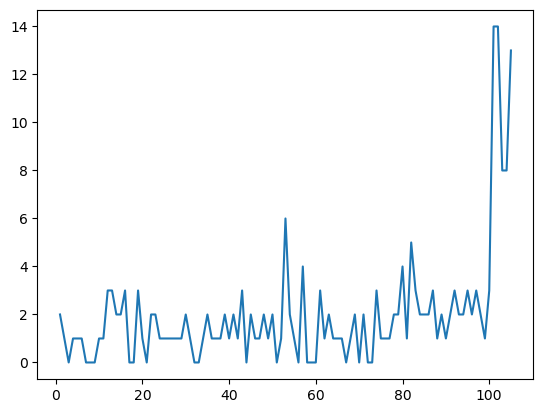

In [20]:
import matplotlib.pyplot as plt
# Define ids
ids = range(1, len(unk_counts)+1)

# Plot the ids and unknown token counts
plt.plot(ids, unk_counts)